In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
coro = pd.read_csv("coro_data.csv")

In [22]:
print (coro.shape)
print(coro.head(5))

(1084, 21)
   id  case_in_country reporting date  Unnamed: 3  \
0   1              NaN      1/20/2020         NaN   
1   2              NaN      1/20/2020         NaN   
2   3              NaN      1/21/2020         NaN   
3   4              NaN      1/21/2020         NaN   
4   5              NaN      1/21/2020         NaN   

                                             summary             location  \
0  First confirmed imported COVID-19 pneumonia pa...  Shenzhen, Guangdong   
1  First confirmed imported COVID-19 pneumonia pa...             Shanghai   
2  First confirmed imported cases in Zhejiang: pa...             Zhejiang   
3  new confirmed imported COVID-19 pneumonia in T...              Tianjin   
4  new confirmed imported COVID-19 pneumonia in T...              Tianjin   

  country  gender   age symptom_onset  ...  hosp_visit_date exposure_start  \
0   China    male  66.0    01/03/2020  ...       01/11/2020     12/29/2019   
1   China  female  56.0     1/15/2020  ...        1

In [23]:
print (coro.columns)

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link'],
      dtype='object')


In [24]:
coro['death'].value_counts()


0    1022
1      62
Name: death, dtype: int64

In [25]:
coro['recovered'].value_counts()


0    924
1    160
Name: recovered, dtype: int64

In [26]:
coro['age'].value_counts()

55.00    72
65.00    52
45.00    39
75.00    37
35.00    36
         ..
0.25      1
6.00      1
1.00      1
84.00     1
91.00     1
Name: age, Length: 85, dtype: int64

In [27]:
coro['gender'].value_counts()

male      519
female    382
Name: gender, dtype: int64

In [28]:
train=coro[['age','gender','death','recovered']]
print(train.head())

    age  gender  death  recovered
0  66.0    male      0          0
1  56.0  female      0          0
2  46.0    male      0          0
3  60.0  female      0          0
4  58.0    male      0          0


### Replacing the missing values by taking into consideration the overall distribution rather than just taking mean

In [29]:
print(train['age'])
import numpy as np
ct = train.age.value_counts(normalize=True)
nl = train.age.isnull()
print("********")
print("ct: ",ct)
print("********")
arr=ct.index
print("********")
print("nl: ",nl)
print("arr: ",arr)
print("********")
np.random.seed(42)
random_fill = np.random.choice(arr, size=nl.sum(), p=ct)
print("********")
print("random_fill: ",random_fill)
print("********")
train.loc[nl, 'age'] = random_fill
print("********")
print(train['age'])
print("********")

0       66.0
1       56.0
2       46.0
3       60.0
4       58.0
        ... 
1079    24.0
1080    35.0
1081     NaN
1082     NaN
1083    70.0
Name: age, Length: 1084, dtype: float64
********
ct:  55.00    0.085511
65.00    0.061758
45.00    0.046318
75.00    0.043943
35.00    0.042755
           ...   
0.25     0.001188
6.00     0.001188
1.00     0.001188
84.00    0.001188
91.00    0.001188
Name: age, Length: 85, dtype: float64
********
********
nl:  0       False
1       False
2       False
3       False
4       False
        ...  
1079    False
1080    False
1081     True
1082     True
1083    False
Name: age, Length: 1084, dtype: bool
arr:  Float64Index([55.0, 65.0, 45.0, 75.0, 35.0, 25.0, 37.0, 56.0, 58.0, 60.0, 85.0,
              50.0, 57.0, 28.0, 36.0, 32.0, 70.0, 49.0, 39.0, 42.0, 30.0, 40.0,
              66.0, 33.0, 31.0, 46.0, 48.0, 24.0, 41.0, 29.0, 68.0, 38.0, 62.0,
              53.0, 59.0, 63.0, 52.0, 69.0, 34.0, 54.0, 51.0, 61.0, 47.0, 73.0,
              27.0, 44.0, 6

C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
import numpy as np
mean_array=coro['age']
 
print ("initial array", mean_array) 
  
# replace nan with col means 
res = np.where(np.isnan(mean_array), np.ma.array(mean_array, 
               mask = np.isnan(mean_array)).mean(axis = 0), mean_array)    
  
# printing final array
print ("final array")
for i in range(len(res)):
    print(i,res[i])

initial array 0       66.0
1       56.0
2       46.0
3       60.0
4       58.0
        ... 
1079    24.0
1080    35.0
1081     NaN
1082     NaN
1083    70.0
Name: age, Length: 1084, dtype: float64
final array
0 66.0
1 56.0
2 46.0
3 60.0
4 58.0
5 44.0
6 34.0
7 37.0
8 39.0
9 56.0
10 18.0
11 32.0
12 37.0
13 51.0
14 57.0
15 56.0
16 50.0
17 52.0
18 33.0
19 40.0
20 70.0
21 51.0
22 49.49020190023753
23 28.0
24 37.0
25 19.0
26 29.0
27 66.0
28 46.0
29 32.0
30 28.0
31 55.0
32 68.0
33 38.0
34 72.0
35 45.0
36 42.0
37 33.0
38 33.0
39 37.0
40 69.0
41 63.0
42 62.0
43 49.0
44 50.0
45 48.0
46 36.0
47 36.0
48 61.0
49 69.0
50 89.0
51 89.0
52 66.0
53 75.0
54 48.0
55 82.0
56 66.0
57 81.0
58 82.0
59 65.0
60 80.0
61 53.0
62 86.0
63 70.0
64 84.0
65 50.0
66 40.0
67 45.0
68 66.0
69 59.0
70 23.0
71 50.0
72 43.0
73 49.0
74 42.0
75 32.0
76 22.0
77 47.0
78 52.0
79 53.0
80 46.0
81 85.0
82 69.0
83 36.0
84 73.0
85 70.0
86 81.0
87 65.0
88 42.0
89 30.0
90 29.0
91 49.49020190023753
92 49.0
93 23.0
94 56.0
95 39.0
96 39.0

829 49.49020190023753
830 49.49020190023753
831 49.49020190023753
832 49.49020190023753
833 49.49020190023753
834 49.49020190023753
835 49.49020190023753
836 49.49020190023753
837 49.49020190023753
838 49.49020190023753
839 49.49020190023753
840 49.49020190023753
841 49.49020190023753
842 31.0
843 49.49020190023753
844 49.49020190023753
845 49.49020190023753
846 49.49020190023753
847 32.0
848 49.49020190023753
849 73.0
850 36.0
851 41.0
852 8.0
853 49.49020190023753
854 49.49020190023753
855 49.49020190023753
856 49.49020190023753
857 37.0
858 34.0
859 39.0
860 70.0
861 64.0
862 49.49020190023753
863 49.49020190023753
864 49.49020190023753
865 49.49020190023753
866 49.49020190023753
867 49.49020190023753
868 49.49020190023753
869 49.49020190023753
870 39.0
871 56.0
872 62.0
873 62.0
874 63.0
875 47.0
876 68.0
877 64.0
878 73.0
879 72.0
880 37.0
881 75.0
882 39.0
883 80.0
884 72.0
885 64.0
886 60.0
887 25.0
888 56.0
889 28.0
890 56.0
891 55.0
892 63.0
893 65.0
894 58.0
895 42.0
896 24.0

In [45]:
import numpy as np
ct = train.gender.value_counts(normalize=True)
nl = train.gender.isnull()
arr=ct.index
print(ct)
np.random.seed(42)
random_fill = np.random.choice(arr, size=nl.sum(), p=ct)
print(random_fill)
train.loc[nl, 'gender'] = random_fill
print(train['gender'])

male      0.581181
female    0.418819
Name: gender, dtype: float64
[]
0         male
1       female
2         male
3       female
4         male
         ...  
1079      male
1080    female
1081      male
1082      male
1083      male
Name: gender, Length: 1084, dtype: object


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
nan_rows = train[train['gender'].isnull()]
print(nan_rows)
print(train['gender'].value_counts('male'))
coro['gender'].value_counts('male')

Empty DataFrame
Columns: [age, gender, death, recovered]
Index: []
male      0.581181
female    0.418819
Name: gender, dtype: float64


male      0.576027
female    0.423973
Name: gender, dtype: float64

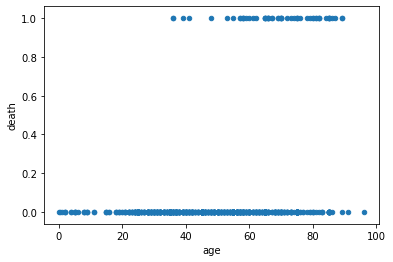

In [17]:
coro.plot(kind='scatter', x='age', y='death') ;

plt.show()

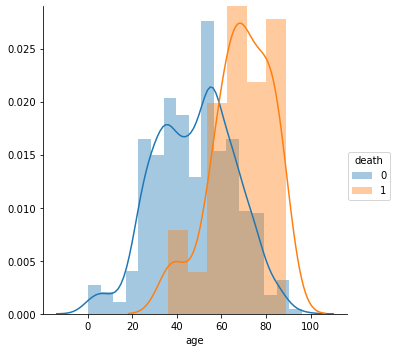

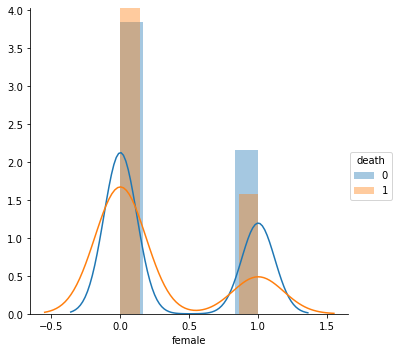

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
coro = pd.read_csv("coro_data.csv")
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(coro, hue="death", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

dum=pd.get_dummies(coro['gender'])
final_t1 = pd.concat([dum, coro],axis=1)
sns.FacetGrid(final_t1, hue="death", size=5) \
   .map(sns.distplot, "female") \
   .add_legend();
plt.show();


# Conclusions on 10/04/2020
### 1. Imbalanced Dataset
### 2. Rate of infection is lesser for human above age 45-50 but the death rate is comparatively Higher.
### 3. Rate of infection is higher in age below 45-50 and but recoverey rate is higher.